# Analysis

1. Most cities in the world exist between 25 degrees laititude and 60 degrees latitude. 
2. Currently cities between 35 and 45 degrees latitude are receiving the most intense sun.  There is a spike in Max temp at these points. Above and below those lines the temperatures beging to drop withe furthest cities only have a high of 20 degrees.
3. Globally, windspeeds do not get much above 15 mph in most cities.
4. There does not appear to be a strong correlation between cloudiness and latitude.  At each line of latitude the cities are pretty well spreadout from 0 to 100% Cloudiness.

In [1]:
%matplotlib inline
import os
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy as cp
from config import api_key
from pandas.io.json import json_normalize
import seaborn as sb

base_url='http://api.openweathermap.org/data/2.5/weather?'
params_OWM = {
    'units':'imperial',
    'APPID':api_key
}

In [2]:
# Pull world data city list from JSON file on local machine.  JSON file obtained from
# OpenWeatherMap website so that ID could be used get precise response for each city

citypath = os.path.join('city.list.json')
with open(citypath, encoding='utf8') as jsonfile:
    owmJSON = json.load(jsonfile)
cities_df = pd.DataFrame.from_dict(json_normalize(owmJSON), orient='columns')
del cities_df['country']
del cities_df['name']
cities_df.head()

,coord.lat,coord.lon,id
0,44.549999,34.283333,707860
1,55.683334,37.666668,519188
2,28.000000,84.633331,1283378
3,29.000000,76.000000,1270260
4,44.599998,33.900002,708546


In [3]:
#Add columns to the dataframe to be populated later.  Rename certain fields from source pull on JSON load
cities_df['City'] = ""
cities_df['Country Code'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""
cities_df.rename(columns={'coord.lat':'Latitude', 'coord.lon':'Longitude'}, inplace=True)

#Gather sample data for project, reset index
sampleSize = int(input('How large should the sample size be?  (Min. 500): '))

while sampleSize < 500:
        sampleSize = input("Sample size to small.  Please choose a number greater than or equal to 500: ")
        sampleSize = int(sampleSize)
        if sampleSize == 500:
            break
            
cities_sample = cities_df.sample(sampleSize, replace=False)
cities_sample = cities_sample.reset_index(drop=True)
cities_sample.head()

How large should the sample size be?  (Min. 500): 2500


,Latitude,Longitude,id,City,Country Code,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,18.833330,-98.000000,3521082,,,,,,
1,33.195869,-117.379478,5378771,,,,,,
2,19.060049,110.515373,1802634,,,,,,
3,41.099709,14.220130,3180601,,,,,,
4,45.443581,-90.298203,5265566,,,,,,


In [4]:
#Use CitiPy to find City and Country
print('Beginning Data Retrieval')
print('----------------------------')
for index, row in cities_sample.iterrows():
    #get lat and lng
    cpLat = row['Latitude']
    cpLng = row['Longitude']
    city = cp.nearest_city(cpLat,cpLng)
    cpCity = (city.city_name).title()
    cities_sample.loc[index,'City'] = cpCity
    cpCountry = city.country_code.upper()
    cities_sample.loc[index,'Country Code'] = cpCountry
    
    params_OWM['id'] = row['id']
    owmURL = requests.get(base_url, params_OWM)
    owmResponse = owmURL.json()
    #print(json.dumps(owmResponse, indent=4))
    
    try:
        cities_sample.loc[index, 'Temperature (F)'] = owmResponse['main']['temp_max']
        cities_sample.loc[index, 'Humidity (%)'] = owmResponse['main']['humidity']
        cities_sample.loc[index, 'Cloudiness (%)'] = owmResponse['clouds']['all']
        cities_sample.loc[index, 'Wind Speed (mph)'] = owmResponse['wind']['speed']
        print(f'Processing record {int(index)+1} of {cities_sample["City"].count()} | {cpCity}, {cpCountry}')
        print(f'{owmURL.url}')
    except (KeyError, IndexError):
        print(f'Error at {KeyError} for cities_sample["City"]...skipping...')
    print('------------------------------------------------------------------------')
#Remove entries with errors or NaN returned. Not doing so causes issues creating scatter plots.
cities_sample.dropna(inplace=True)
    

Beginning Data Retrieval
----------------------------
Processing record 1 of 2500 | Acuexcomac, MX
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3521082
------------------------------------------------------------------------
Processing record 2 of 2500 | Oceanside, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=5378771
------------------------------------------------------------------------
Processing record 3 of 2500 | Wanning, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1802634
------------------------------------------------------------------------
Processing record 4 of 2500 | Capua, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3180601
------------------------------------------------------------------------
Processing record 5 of 2500 | Merri

Processing record 37 of 2500 | Sydney, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2167391
------------------------------------------------------------------------
Processing record 38 of 2500 | Golden Gate, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4151550
------------------------------------------------------------------------
Processing record 39 of 2500 | Donauworth, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2847079
------------------------------------------------------------------------
Processing record 40 of 2500 | Port Pirie, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2060589
------------------------------------------------------------------------
Processing record 41 of 2500 | Nanyang, CN
http://api.openweathermap.org/data/2

Processing record 73 of 2500 | Jaroslaw, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=755963
------------------------------------------------------------------------
Processing record 74 of 2500 | Bad Kreuznach, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2866264
------------------------------------------------------------------------
Processing record 75 of 2500 | Mikhaylovskaya, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=526814
------------------------------------------------------------------------
Processing record 76 of 2500 | Salzhemmendorf, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2877007
------------------------------------------------------------------------
Processing record 77 of 2500 | Houma, CN
http://api.openweathermap.or

Processing record 109 of 2500 | Ruteng, ID
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7414475
------------------------------------------------------------------------
Processing record 110 of 2500 | Neustadt, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6559300
------------------------------------------------------------------------
Processing record 111 of 2500 | Ulychne, UA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=690745
------------------------------------------------------------------------
Processing record 112 of 2500 | Mondeville, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6427517
------------------------------------------------------------------------
Processing record 113 of 2500 | Cabilocaan, PH
http://api.openweathermap.org/data/

Processing record 145 of 2500 | Murwillumbah, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2156049
------------------------------------------------------------------------
Processing record 146 of 2500 | Tomino, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3129697
------------------------------------------------------------------------
Processing record 147 of 2500 | Arrigorriaga, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6362361
------------------------------------------------------------------------
Processing record 148 of 2500 | Kaiserslautern, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2837512
------------------------------------------------------------------------
Processing record 149 of 2500 | Bansi, IN
http://api.openweathermap.

Processing record 181 of 2500 | Mitry-Mory, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2991362
------------------------------------------------------------------------
Processing record 182 of 2500 | Mount Vernon, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4250895
------------------------------------------------------------------------
Processing record 183 of 2500 | Oxnard, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=5405878
------------------------------------------------------------------------
Processing record 184 of 2500 | Merville, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6438381
------------------------------------------------------------------------
Processing record 185 of 2500 | Kostrzyn, PL
http://api.openweathermap.org/d

Processing record 217 of 2500 | Garwolin, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7532094
------------------------------------------------------------------------
Processing record 218 of 2500 | Huntington, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4291960
------------------------------------------------------------------------
Processing record 219 of 2500 | Les Clayes-Sous-Bois, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6444100
------------------------------------------------------------------------
Processing record 220 of 2500 | Yarmouth, CA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6139605
------------------------------------------------------------------------
Processing record 221 of 2500 | Digras, IN
http://api.openweatherm

Processing record 253 of 2500 | Lotoshino, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=857301
------------------------------------------------------------------------
Processing record 254 of 2500 | Gawler, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2070698
------------------------------------------------------------------------
Processing record 255 of 2500 | Elmshorn, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6551695
------------------------------------------------------------------------
Processing record 256 of 2500 | Grajewo, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=757386
------------------------------------------------------------------------
Processing record 257 of 2500 | Overtown, GB
http://api.openweathermap.org/data/2.5/

Processing record 289 of 2500 | Neckarsulm, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2895311
------------------------------------------------------------------------
Processing record 290 of 2500 | Komyshuvakha, UA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=690367
------------------------------------------------------------------------
Processing record 291 of 2500 | Preston, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=5604473
------------------------------------------------------------------------
Processing record 292 of 2500 | Navahrudak, BY
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=627106
------------------------------------------------------------------------
Processing record 293 of 2500 | San Carlos, PH
http://api.openweathermap.or

Processing record 325 of 2500 | Hatfield, GB
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2638546
------------------------------------------------------------------------
Processing record 326 of 2500 | Kunming, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6824964
------------------------------------------------------------------------
Processing record 327 of 2500 | Kecskemet, HU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3050022
------------------------------------------------------------------------
Processing record 328 of 2500 | Valverde Del Camino, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2521585
------------------------------------------------------------------------
Processing record 329 of 2500 | Shaowu, CN
http://api.openweathermap.

Processing record 361 of 2500 | Krasnoyarka, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1502041
------------------------------------------------------------------------
Processing record 362 of 2500 | Dublin, IE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3315311
------------------------------------------------------------------------
Processing record 363 of 2500 | Verovice, CZ
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3063082
------------------------------------------------------------------------
Processing record 364 of 2500 | Alzey, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2896599
------------------------------------------------------------------------
Processing record 365 of 2500 | Amapa, BR
http://api.openweathermap.org/data/2.5/w

Processing record 398 of 2500 | Falavarjan, IR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=418606
------------------------------------------------------------------------
Processing record 399 of 2500 | Voitsberg, AT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7873415
------------------------------------------------------------------------
Processing record 400 of 2500 | Leon, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6358746
------------------------------------------------------------------------
Processing record 401 of 2500 | Canedo, PT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=8010809
------------------------------------------------------------------------
Processing record 402 of 2500 | North Aurora, US
http://api.openweathermap.org/data/

Processing record 434 of 2500 | Guadix, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6357700
------------------------------------------------------------------------
Processing record 435 of 2500 | Tynaarlo, NL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6544282
------------------------------------------------------------------------
Processing record 436 of 2500 | Ardmore, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4549253
------------------------------------------------------------------------
Processing record 437 of 2500 | Kasukabe, JP
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1859884
------------------------------------------------------------------------
Processing record 438 of 2500 | Montlucon, FR
http://api.openweathermap.org/data/2.

Processing record 471 of 2500 | Montelimar, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3038173
------------------------------------------------------------------------
Processing record 472 of 2500 | Bautzen, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2851478
------------------------------------------------------------------------
Processing record 473 of 2500 | Leeton, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2147554
------------------------------------------------------------------------
Processing record 474 of 2500 | Hainburg, AT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2780448
------------------------------------------------------------------------
Processing record 475 of 2500 | Kingaroy, AU
http://api.openweathermap.org/data/2

Processing record 507 of 2500 | Bad Ems, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6554049
------------------------------------------------------------------------
Processing record 508 of 2500 | Rathdrum, IE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3315013
------------------------------------------------------------------------
Processing record 509 of 2500 | Waingapu, ID
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7087314
------------------------------------------------------------------------
Processing record 510 of 2500 | Lokachi, UA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=702878
------------------------------------------------------------------------
Processing record 511 of 2500 | Fundao, PT
http://api.openweathermap.org/data/2.5/w

Processing record 543 of 2500 | Sodegaura, JP
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6419747
------------------------------------------------------------------------
Processing record 544 of 2500 | Plochingen, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2849118
------------------------------------------------------------------------
Processing record 545 of 2500 | Savonlinna, FI
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=637288
------------------------------------------------------------------------
Processing record 546 of 2500 | Zhanjiang, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1784990
------------------------------------------------------------------------
Processing record 547 of 2500 | Mianwali, PK
http://api.openweathermap.org/

Processing record 579 of 2500 | Oloron-Sainte-Marie, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2989410
------------------------------------------------------------------------
Processing record 580 of 2500 | Fukue, JP
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1839011
------------------------------------------------------------------------
Processing record 581 of 2500 | Ecublens, CH
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2659283
------------------------------------------------------------------------
Processing record 582 of 2500 | Tarbes, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3034664
------------------------------------------------------------------------
Processing record 583 of 2500 | Baar, CH
http://api.openweathermap.org/dat

Processing record 615 of 2500 | Jinsha, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1805408
------------------------------------------------------------------------
Processing record 616 of 2500 | Kulashi, GE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=613641
------------------------------------------------------------------------
Processing record 617 of 2500 | Hamadan, IR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=14256
------------------------------------------------------------------------
Processing record 618 of 2500 | Argentan, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6427559
------------------------------------------------------------------------
Processing record 619 of 2500 | Nogent-Sur-Oise, FR
http://api.openweathermap.org/data/

Processing record 651 of 2500 | Bailleul, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2994168
------------------------------------------------------------------------
Processing record 652 of 2500 | Erfurt, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2856298
------------------------------------------------------------------------
Processing record 653 of 2500 | Laurel, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4450441
------------------------------------------------------------------------
Processing record 654 of 2500 | Pregradnaya, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=505539
------------------------------------------------------------------------
Processing record 655 of 2500 | Saint-Jean-De-Maurienne, FR
http://api.openweather

Processing record 687 of 2500 | Vagharshapat, AM
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=616062
------------------------------------------------------------------------
Processing record 688 of 2500 | Storsteinnes, NO
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3136023
------------------------------------------------------------------------
Processing record 689 of 2500 | Non Sung, TH
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1611394
------------------------------------------------------------------------
Processing record 690 of 2500 | Epinal, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3021713
------------------------------------------------------------------------
Processing record 691 of 2500 | Fairborn, US
http://api.openweathermap.org/

Processing record 723 of 2500 | Boppard, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2877774
------------------------------------------------------------------------
Processing record 724 of 2500 | Waimes, BE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2784200
------------------------------------------------------------------------
Processing record 725 of 2500 | Yaroslavl, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=468902
------------------------------------------------------------------------
Processing record 726 of 2500 | Grevesmuhlen, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2949941
------------------------------------------------------------------------
Processing record 727 of 2500 | Jesi, IT
http://api.openweathermap.org/data/2.5

Processing record 759 of 2500 | Zlatica, BG
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=732655
------------------------------------------------------------------------
Processing record 760 of 2500 | Gland, CH
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7287484
------------------------------------------------------------------------
Processing record 761 of 2500 | Granada, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6357709
------------------------------------------------------------------------
Processing record 762 of 2500 | Saint-Martin-Boulogne, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6439982
------------------------------------------------------------------------
Processing record 763 of 2500 | Khodz, RU
http://api.openweathermap.org/d

------------------------------------------------------------------------
Processing record 796 of 2500 | Piekary Slaskie, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3089125
------------------------------------------------------------------------
Processing record 797 of 2500 | Kazalinsk, KZ
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1517529
------------------------------------------------------------------------
Processing record 798 of 2500 | Andover, GB
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2638740
------------------------------------------------------------------------
Processing record 799 of 2500 | Greifswald, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2816531
-----------------------------------------------------------------------

Processing record 832 of 2500 | Freistadt, AT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2769344
------------------------------------------------------------------------
Processing record 833 of 2500 | Casino, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2160880
------------------------------------------------------------------------
Processing record 834 of 2500 | Saint Michael, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=5045258
------------------------------------------------------------------------
Processing record 835 of 2500 | Chiesanuova, SM
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3170472
------------------------------------------------------------------------
Processing record 836 of 2500 | Ulaanbaatar, MN
http://api.openweathermap

Processing record 868 of 2500 | Pingliang, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7518353
------------------------------------------------------------------------
Processing record 869 of 2500 | Ylivieska, FI
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=634324
------------------------------------------------------------------------
Processing record 870 of 2500 | Tezonapa, MX
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3801225
------------------------------------------------------------------------
Processing record 871 of 2500 | Norfolk, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=5081365
------------------------------------------------------------------------
Processing record 872 of 2500 | Duderstadt, DE
http://api.openweathermap.org/dat

Processing record 904 of 2500 | Tonneins, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6435022
------------------------------------------------------------------------
Processing record 905 of 2500 | Bitburg, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2953895
------------------------------------------------------------------------
Processing record 906 of 2500 | Krasnyy Oktyabr, UA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=710229
------------------------------------------------------------------------
Processing record 907 of 2500 | Manalongon, PH
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1702145
------------------------------------------------------------------------
Processing record 908 of 2500 | Fountain, US
http://api.openweathermap.or

Processing record 940 of 2500 | Eitorf, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2886851
------------------------------------------------------------------------
Processing record 941 of 2500 | Urbana, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4905866
------------------------------------------------------------------------
Processing record 942 of 2500 | Atuona, PF
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4030656
------------------------------------------------------------------------
Processing record 943 of 2500 | Navahrudak, BY
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=625495
------------------------------------------------------------------------
Processing record 944 of 2500 | Krasnoshchekovo, RU
http://api.openweathermap.org/dat

Processing record 976 of 2500 | Presidencia Roque Saenz Pena, AR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3429866
------------------------------------------------------------------------
Processing record 977 of 2500 | Bad Gandersheim, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2928252
------------------------------------------------------------------------
Processing record 978 of 2500 | Sana, PE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3692667
------------------------------------------------------------------------
Processing record 979 of 2500 | Pabrade, LT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=623941
------------------------------------------------------------------------
Processing record 980 of 2500 | Safranbolu, TR
http://api.o

Processing record 1012 of 2500 | Ahtopol, BG
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=733722
------------------------------------------------------------------------
Processing record 1013 of 2500 | Trenton, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4528722
------------------------------------------------------------------------
Processing record 1014 of 2500 | Tarbes, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2989742
------------------------------------------------------------------------
Processing record 1015 of 2500 | Ferreira Do Alentejo, PT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=8010887
------------------------------------------------------------------------
Processing record 1016 of 2500 | Cegrane, MK
http://api.openweatherma

Processing record 1048 of 2500 | Ostrowiec Swietokrzyski, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=766193
------------------------------------------------------------------------
Processing record 1049 of 2500 | Rus, RO
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=668435
------------------------------------------------------------------------
Processing record 1050 of 2500 | Kugesi, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=492723
------------------------------------------------------------------------
Processing record 1051 of 2500 | Limanowa, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=766734
------------------------------------------------------------------------
Processing record 1052 of 2500 | Parchim, DE
http://api.openweathermap.o

Processing record 1084 of 2500 | Patea, NZ
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2206361
------------------------------------------------------------------------
Processing record 1085 of 2500 | Termoli, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3172865
------------------------------------------------------------------------
Processing record 1086 of 2500 | Cappelle-La-Grande, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6617211
------------------------------------------------------------------------
Processing record 1087 of 2500 | Heishan, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2035911
------------------------------------------------------------------------
Processing record 1088 of 2500 | Neustadt, DE
http://api.openweathermap

Processing record 1120 of 2500 | Shiyan, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1783825
------------------------------------------------------------------------
Processing record 1121 of 2500 | Lumajang, ID
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7347323
------------------------------------------------------------------------
Processing record 1122 of 2500 | Coxcatlan, MX
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3530150
------------------------------------------------------------------------
Processing record 1123 of 2500 | Eichstatt, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2839646
------------------------------------------------------------------------
Processing record 1124 of 2500 | Reinheim, DE
http://api.openweathermap.org/

Processing record 1156 of 2500 | Biala Podlaska, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=766044
------------------------------------------------------------------------
Processing record 1157 of 2500 | Dinkelsbuhl, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2936082
------------------------------------------------------------------------
Processing record 1158 of 2500 | Naumburg, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6549001
------------------------------------------------------------------------
Processing record 1159 of 2500 | Veisiejai, LT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=593338
------------------------------------------------------------------------
Processing record 1160 of 2500 | Tonder, DK
http://api.openweatherma

Processing record 1192 of 2500 | Dreux, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6615063
------------------------------------------------------------------------
Processing record 1193 of 2500 | Liberia, CR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3623076
------------------------------------------------------------------------
Processing record 1194 of 2500 | Plaisir, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2979832
------------------------------------------------------------------------
Processing record 1195 of 2500 | Loncoche, CL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3885251
------------------------------------------------------------------------
Processing record 1196 of 2500 | Arauli, HN
http://api.openweathermap.org/data/2.

------------------------------------------------------------------------
Processing record 1229 of 2500 | Irmo, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4574280
------------------------------------------------------------------------
Processing record 1230 of 2500 | Xianyang, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1787247
------------------------------------------------------------------------
Processing record 1231 of 2500 | Bafilo, TG
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2367656
------------------------------------------------------------------------
Processing record 1232 of 2500 | Germersheim, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2925047
------------------------------------------------------------------------
Proces

Processing record 1265 of 2500 | Weiz, AT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7873583
------------------------------------------------------------------------
Processing record 1266 of 2500 | Yiyang, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1793156
------------------------------------------------------------------------
Processing record 1267 of 2500 | La Union, SV
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3584772
------------------------------------------------------------------------
Processing record 1268 of 2500 | Vaiano, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6539665
------------------------------------------------------------------------
Processing record 1269 of 2500 | Bayir, JO
http://api.openweathermap.org/data/2.5/we

Processing record 1301 of 2500 | Itzehoe, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6552185
------------------------------------------------------------------------
Processing record 1302 of 2500 | Milton Keynes, GB
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3333173
------------------------------------------------------------------------
Processing record 1303 of 2500 | Sabha, JO
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=167408
------------------------------------------------------------------------
Processing record 1304 of 2500 | Schleswig, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2810496
------------------------------------------------------------------------
Processing record 1305 of 2500 | Wloclawek, PL
http://api.openweathermap.or

Processing record 1337 of 2500 | Issoire, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3025743
------------------------------------------------------------------------
Processing record 1338 of 2500 | Beernem, BE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2802437
------------------------------------------------------------------------
Processing record 1339 of 2500 | Riesa, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2846939
------------------------------------------------------------------------
Processing record 1340 of 2500 | Vierzon, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6434142
------------------------------------------------------------------------
Processing record 1341 of 2500 | Ulan-Ude, RU
http://api.openweathermap.org/data/2

Processing record 1373 of 2500 | Forst, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3102615
------------------------------------------------------------------------
Processing record 1374 of 2500 | Tucuman, AR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3847103
------------------------------------------------------------------------
Processing record 1375 of 2500 | Bollene, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2993342
------------------------------------------------------------------------
Processing record 1376 of 2500 | Ladysmith, CA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=5904742
------------------------------------------------------------------------
Processing record 1377 of 2500 | Washington, US
http://api.openweathermap.org/da

Processing record 1409 of 2500 | Thomaston, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4221395
------------------------------------------------------------------------
Processing record 1410 of 2500 | Obersiggenthal, CH
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7285727
------------------------------------------------------------------------
Processing record 1411 of 2500 | Sayula, MX
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3983216
------------------------------------------------------------------------
Processing record 1412 of 2500 | Zvenigorod, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=819292
------------------------------------------------------------------------
Processing record 1413 of 2500 | Paks, HU
http://api.openweathermap.or

Processing record 1445 of 2500 | La Rochelle, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2996103
------------------------------------------------------------------------
Processing record 1446 of 2500 | Inverness, CA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=5990823
------------------------------------------------------------------------
Processing record 1447 of 2500 | Moncton, CA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6177844
------------------------------------------------------------------------
Processing record 1448 of 2500 | Motril, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2521903
------------------------------------------------------------------------
Processing record 1449 of 2500 | Obernai, FR
http://api.openweathermap.org/

Processing record 1481 of 2500 | Plauen, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6547384
------------------------------------------------------------------------
Processing record 1482 of 2500 | Sydney, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2207819
------------------------------------------------------------------------
Processing record 1483 of 2500 | Leer, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2888758
------------------------------------------------------------------------
Processing record 1484 of 2500 | Bischofswerda, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2851553
------------------------------------------------------------------------
Processing record 1485 of 2500 | Mondeville, FR
http://api.openweathermap.org/d

Processing record 1517 of 2500 | Bad Langensalza, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6549943
------------------------------------------------------------------------
Processing record 1518 of 2500 | Remscheid, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2819545
------------------------------------------------------------------------
Processing record 1519 of 2500 | Moron, MN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1515416
------------------------------------------------------------------------
Processing record 1520 of 2500 | Avezzano, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3179665
------------------------------------------------------------------------
Processing record 1521 of 2500 | Lublin, PL
http://api.openweathermap.o

Processing record 1554 of 2500 | Chamalieres, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2969783
------------------------------------------------------------------------
Processing record 1555 of 2500 | Schwarzenbek, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2814292
------------------------------------------------------------------------
Processing record 1556 of 2500 | Avila, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6355680
------------------------------------------------------------------------
Processing record 1557 of 2500 | London, GB
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2647694
------------------------------------------------------------------------
Processing record 1558 of 2500 | Hennef, DE
http://api.openweathermap.org/

Processing record 1591 of 2500 | Feldbach, AT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7873379
------------------------------------------------------------------------
Processing record 1592 of 2500 | Kronshagen, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2956754
------------------------------------------------------------------------
Processing record 1593 of 2500 | Yunyang, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1803122
------------------------------------------------------------------------
Processing record 1594 of 2500 | Kempten, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3205561
------------------------------------------------------------------------
Processing record 1595 of 2500 | Erfurt, DE
http://api.openweathermap.org/da

Processing record 1627 of 2500 | Ingelheim, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6554871
------------------------------------------------------------------------
Processing record 1628 of 2500 | Zaventem, BE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2783310
------------------------------------------------------------------------
Processing record 1629 of 2500 | Canelli, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3167249
------------------------------------------------------------------------
Processing record 1630 of 2500 | Etchojoa, MX
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4017354
------------------------------------------------------------------------
Processing record 1631 of 2500 | Mountrath, IE
http://api.openweathermap.org

Processing record 1663 of 2500 | Vicuna, CL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3877770
------------------------------------------------------------------------
Processing record 1664 of 2500 | Rostock, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2888559
------------------------------------------------------------------------
Processing record 1665 of 2500 | Hrusovany Nad Jevisovkou, CZ
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3069395
------------------------------------------------------------------------
Processing record 1666 of 2500 | Warwick, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2143106
------------------------------------------------------------------------
Processing record 1667 of 2500 | Olot, ES
http://api.openweather

Processing record 1700 of 2500 | Oviedo, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6355236
------------------------------------------------------------------------
Processing record 1701 of 2500 | Williamsburg, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=4794943
------------------------------------------------------------------------
Processing record 1702 of 2500 | Abingdon, GB
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2636485
------------------------------------------------------------------------
Processing record 1703 of 2500 | Montabaur, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6554111
------------------------------------------------------------------------
Processing record 1704 of 2500 | Ngoro, ID
http://api.openweathermap.org/

Processing record 1736 of 2500 | La Roda, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2510861
------------------------------------------------------------------------
Processing record 1737 of 2500 | Vauvert, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6431479
------------------------------------------------------------------------
Processing record 1738 of 2500 | Cervignano Del Friuli, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3217433
------------------------------------------------------------------------
Processing record 1739 of 2500 | Mayen, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2890276
------------------------------------------------------------------------
Processing record 1740 of 2500 | Coihaique, CL
http://api.openweathe

Processing record 1773 of 2500 | Enniskerry, IE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3315215
------------------------------------------------------------------------
Processing record 1774 of 2500 | Rush, IE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3230840
------------------------------------------------------------------------
Processing record 1775 of 2500 | Domoni, KM
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=921906
------------------------------------------------------------------------
Processing record 1776 of 2500 | Vlcnov, CZ
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3074280
------------------------------------------------------------------------
Processing record 1777 of 2500 | Zipaquira, CO
http://api.openweathermap.org/data/2

Processing record 1809 of 2500 | Phu Ly, VN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1580142
------------------------------------------------------------------------
Processing record 1810 of 2500 | Okaya, JP
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1854384
------------------------------------------------------------------------
Processing record 1811 of 2500 | Loano, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3181832
------------------------------------------------------------------------
Processing record 1812 of 2500 | Bejar, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6356891
------------------------------------------------------------------------
Processing record 1813 of 2500 | Cirie, IT
http://api.openweathermap.org/data/2.5/weath

Processing record 1845 of 2500 | Morshansk, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=525138
------------------------------------------------------------------------
Processing record 1846 of 2500 | Bischwiller, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3011976
------------------------------------------------------------------------
Processing record 1847 of 2500 | Reinosa, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6356570
------------------------------------------------------------------------
Processing record 1848 of 2500 | Melton Mowbray, GB
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2647874
------------------------------------------------------------------------
Processing record 1849 of 2500 | Lavos, PT
http://api.openweathermap

Processing record 1881 of 2500 | Lakefield, CA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6048370
------------------------------------------------------------------------
Processing record 1882 of 2500 | Moravsky Beroun, CZ
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3070816
------------------------------------------------------------------------
Processing record 1883 of 2500 | Khairpur Nathan Shah, PK
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1174344
------------------------------------------------------------------------
Processing record 1884 of 2500 | Spassk-Ryazanskiy, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=561771
------------------------------------------------------------------------
Processing record 1885 of 2500 | Tomino, ES
http

Processing record 1917 of 2500 | Mimoso Do Sul, BR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3457161
------------------------------------------------------------------------
Processing record 1918 of 2500 | Tangermunde, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2873951
------------------------------------------------------------------------
Processing record 1919 of 2500 | Derendingen, CH
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6691338
------------------------------------------------------------------------
Processing record 1920 of 2500 | Swan Hill, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2149964
------------------------------------------------------------------------
Processing record 1921 of 2500 | Dublin, US
http://api.openweath

Processing record 1954 of 2500 | Casino, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2172153
------------------------------------------------------------------------
Processing record 1955 of 2500 | Wokingham, GB
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3333221
------------------------------------------------------------------------
Processing record 1956 of 2500 | Vichy, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2986580
------------------------------------------------------------------------
Processing record 1957 of 2500 | Le Francois, MQ
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3570429
------------------------------------------------------------------------
Processing record 1958 of 2500 | Tual, ID
http://api.openweathermap.org/data/

Processing record 1990 of 2500 | Betzdorf, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6554274
------------------------------------------------------------------------
Processing record 1991 of 2500 | Tudela, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3122077
------------------------------------------------------------------------
Processing record 1992 of 2500 | Sayyan, YE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=75133
------------------------------------------------------------------------
Processing record 1993 of 2500 | Westerland, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6551578
------------------------------------------------------------------------
Processing record 1994 of 2500 | Cedar Hill, US
http://api.openweathermap.org/da

Processing record 2026 of 2500 | Idlib, SY
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=172027
------------------------------------------------------------------------
Processing record 2027 of 2500 | Calatayud, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3121370
------------------------------------------------------------------------
Processing record 2028 of 2500 | Nuremberg, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2876291
------------------------------------------------------------------------
Processing record 2029 of 2500 | Furstenwalde, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6547643
------------------------------------------------------------------------
Processing record 2030 of 2500 | Cossato, IT
http://api.openweathermap.org

Processing record 2062 of 2500 | La Roda, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2510579
------------------------------------------------------------------------
Processing record 2063 of 2500 | Gangapur, IN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1271680
------------------------------------------------------------------------
Processing record 2064 of 2500 | Blora, ID
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=8074097
------------------------------------------------------------------------
Processing record 2065 of 2500 | Walcz, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3083026
------------------------------------------------------------------------
Processing record 2066 of 2500 | Dunmore, US
http://api.openweathermap.org/data/2.5

Processing record 2098 of 2500 | Dumbraveni, RO
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=678700
------------------------------------------------------------------------
Processing record 2099 of 2500 | Ballina, IE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2966778
------------------------------------------------------------------------
Processing record 2100 of 2500 | Donauworth, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2942702
------------------------------------------------------------------------
Processing record 2101 of 2500 | Segovia, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6360773
------------------------------------------------------------------------
Processing record 2102 of 2500 | Tolentino, IT
http://api.openweathermap.or

Processing record 2134 of 2500 | Binalbagan, PH
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1725157
------------------------------------------------------------------------
Processing record 2135 of 2500 | Oteleni, RO
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=671607
------------------------------------------------------------------------
Processing record 2136 of 2500 | Arco, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3164324
------------------------------------------------------------------------
Processing record 2137 of 2500 | Priverno, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3174309
------------------------------------------------------------------------
Processing record 2138 of 2500 | Bhadasar, IN
http://api.openweathermap.org/data

Processing record 2170 of 2500 | Blonay, CH
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2660709
------------------------------------------------------------------------
Processing record 2171 of 2500 | Kirchzarten, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2868831
------------------------------------------------------------------------
Processing record 2172 of 2500 | Sydney, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2155412
------------------------------------------------------------------------
Processing record 2173 of 2500 | Bielsko-Biala, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7532925
------------------------------------------------------------------------
Processing record 2174 of 2500 | Zollikofen, CH
http://api.openweatherma

Processing record 2206 of 2500 | Lucena, PH
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1705357
------------------------------------------------------------------------
Processing record 2207 of 2500 | Corridonia, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3176604
------------------------------------------------------------------------
Processing record 2208 of 2500 | Sao Borja, BR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3433842
------------------------------------------------------------------------
Processing record 2209 of 2500 | Changde, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1928195
------------------------------------------------------------------------
Processing record 2210 of 2500 | Singureni, RO
http://api.openweathermap.org

Processing record 2242 of 2500 | Banda, IN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1277398
------------------------------------------------------------------------
Processing record 2243 of 2500 | Kyabram, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2157716
------------------------------------------------------------------------
Processing record 2244 of 2500 | Omemee, CA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6065536
------------------------------------------------------------------------
Processing record 2245 of 2500 | Yeghegnut, AM
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=616060
------------------------------------------------------------------------
Processing record 2246 of 2500 | Bombarral, PT
http://api.openweathermap.org/data/

Processing record 2278 of 2500 | Zingem, BE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2783216
------------------------------------------------------------------------
Processing record 2279 of 2500 | Truro, CA
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=5909464
------------------------------------------------------------------------
Processing record 2280 of 2500 | Szamotuly, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3090364
------------------------------------------------------------------------
Processing record 2281 of 2500 | Wucheng, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1553431
------------------------------------------------------------------------
Processing record 2282 of 2500 | Coulommiers, FR
http://api.openweathermap.org/da

Processing record 2314 of 2500 | Waingapu, ID
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7389521
------------------------------------------------------------------------
Processing record 2315 of 2500 | Kilkenny, IE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2964209
------------------------------------------------------------------------
Processing record 2316 of 2500 | Karlshus, NO
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3150437
------------------------------------------------------------------------
Processing record 2317 of 2500 | Melbourne, AU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=7932629
------------------------------------------------------------------------
Processing record 2318 of 2500 | Nanchang, CN
http://api.openweathermap.org

Processing record 2350 of 2500 | Xianyang, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1910241
------------------------------------------------------------------------
Processing record 2351 of 2500 | Titisee-Neustadt, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6555747
------------------------------------------------------------------------
Processing record 2352 of 2500 | Poitiers, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3012643
------------------------------------------------------------------------
Processing record 2353 of 2500 | Dolgoprudnyy, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=535270
------------------------------------------------------------------------
Processing record 2354 of 2500 | Vire, FR
http://api.openweatherm

Processing record 2386 of 2500 | Kanashevo, RU
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1504716
------------------------------------------------------------------------
Processing record 2387 of 2500 | Vilela, PT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=8013954
------------------------------------------------------------------------
Processing record 2388 of 2500 | Saint-Esteve, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2998018
------------------------------------------------------------------------
Processing record 2389 of 2500 | Zaragoza, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3112795
------------------------------------------------------------------------
Processing record 2390 of 2500 | Haukipudas, FI
http://api.openweathermap

Processing record 2422 of 2500 | Pandegelang, ID
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1642201
------------------------------------------------------------------------
Processing record 2423 of 2500 | Shoreview, US
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=5047234
------------------------------------------------------------------------
Processing record 2424 of 2500 | Ningbo, CN
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1887083
------------------------------------------------------------------------
Processing record 2425 of 2500 | Wegrow, PL
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=764876
------------------------------------------------------------------------
Processing record 2426 of 2500 | Baranain, ES
http://api.openweathermap.org/d

Processing record 2458 of 2500 | Ascheberg, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2908222
------------------------------------------------------------------------
Processing record 2459 of 2500 | Potamos, GR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2463594
------------------------------------------------------------------------
Processing record 2460 of 2500 | Katano, JP
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=1855566
------------------------------------------------------------------------
Processing record 2461 of 2500 | Ponferrada, ES
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3112750
------------------------------------------------------------------------
Processing record 2462 of 2500 | Carroll, US
http://api.openweathermap.org/d

Processing record 2494 of 2500 | Tourlaville, FR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2972270
------------------------------------------------------------------------
Processing record 2495 of 2500 | Santhia, IT
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=6540102
------------------------------------------------------------------------
Processing record 2496 of 2500 | Halle, DE
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=2871792
------------------------------------------------------------------------
Processing record 2497 of 2500 | Parana, AR
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=2178997af721c4698afb0eae9d6f056f&id=3855140
------------------------------------------------------------------------
Processing record 2498 of 2500 | Totolapa, MX
http://api.openweathermap.org/dat

In [5]:
#cities_sample.head(20)
cities_sample.to_csv('Cities_Sample-Goodman.csv',sep=',')

In [6]:
#Create variables to be used with scatter plots
import math
lat = cities_sample['Latitude']
latMin = (math.floor(cities_sample['Latitude'].min())-5)
latMax = (math.ceil(cities_sample['Latitude'].max())+5)
temp = cities_sample['Temperature (F)']
humid = cities_sample['Humidity (%)']
cloud = cities_sample['Cloudiness (%)']
wind = cities_sample['Wind Speed (mph)']

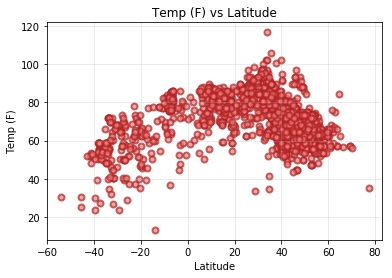

In [7]:
#Scatter Plot 1 - Temperature (F) vs. Latitude
fig, ax = plt.subplots()
ax.scatter(lat, temp, c='lightcoral',alpha=0.7, edgecolors='firebrick', linewidths=2 )
ax.set_title('Temp (F) vs Latitude')
ax.grid(alpha=0.3)
ax.set_xlabel('Latitude')
ax.set_ylabel('Temp (F)')
ax.set_xlim(latMin, latMax)
fig.savefig('01_Temp-V-Lat.png')

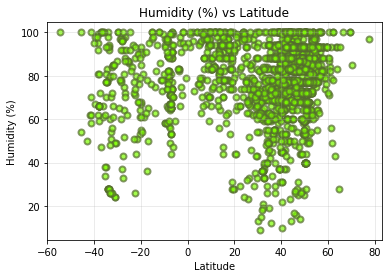

In [8]:
#Scatter Plot 2 - Humidity (%) vs. Latitude
fig, ax = plt.subplots()
ax.scatter(lat, humid, c='lawngreen',alpha=0.7, edgecolors='darkolivegreen', linewidths=2 )
ax.set_title('Humidity (%) vs Latitude')
ax.grid(alpha=0.3)
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_xlim(latMin, latMax)
fig.savefig('02_Humidity-V-Lat.png')

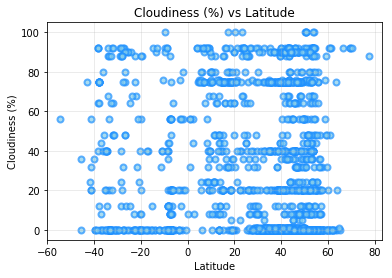

In [9]:
#Scatter Plot 3 - Cloudiness(%) vs. Latitude
fig, ax = plt.subplots()
ax.scatter(lat, cloud, c='skyblue',alpha=0.7, edgecolors='dodgerblue', linewidths=2)
ax.set_title('Cloudiness (%) vs Latitude')
ax.grid(alpha=0.3)
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_xlim(latMin, latMax)
fig.savefig('03_Cloudiness-V-Lat.png')

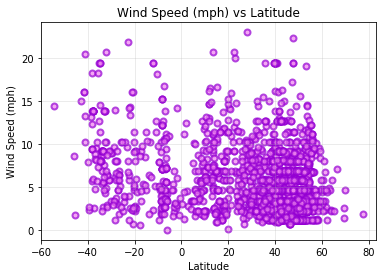

In [10]:
#Scatter Plot 4 - Wind Speed(mpg) vs. Latitude
fig, ax = plt.subplots()
ax.scatter(lat, wind, c='violet',alpha=0.7, edgecolors='darkviolet', linewidths=2 )
ax.set_title('Wind Speed (mph) vs Latitude')
ax.grid(alpha=0.3)
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.set_xlim(latMin, latMax)
fig.savefig('04_WindSpeed-V-Lat.png')